## 大同公司財務報表 文字探勘
### 匯入套件
- wordcloud 視覺化詞頻
- matplotlib.pyplot 科學繪圖套件(繪製bar圖)
- jieba 分出詞彙
- % matplotlib inline 繪圖結果顯示在格子內不在新視窗開啟

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
% matplotlib inline

### 用open方法開啟儲存好的文字檔
### 將文字儲存到變數demo_text

In [2]:
f = open('大同附註.txt','r', encoding ="utf-8")
demo_text = f.read()
demo_text

'\ufeff大同股份有限公司及子公司 合併財務報表附註 民國一○六年十二月三十一日及民國一○五年十二月三十一日 (金額除另有註明者外，均以新臺幣千元為單位)\n一、 公司沿革\n大同股份有限公司(以下簡稱本公司或大同公司)係依照公司法規定設立之營利事業，初 於民國七年創業，成立公司組織於民國 28 年，當時資本額為 18 萬臺圓，經數度增資為 2,000 萬臺圓，民國 38 年幣制改革後，重新登記資本額折算為新臺幣 200 千元。截至民 國一○六年十二月三十一日實收資本額為 23,395,367 千元，其中已登記股本為 23,395,367 千元。\n本公司業務為：一、下列各項產品設計、製造、買賣、承裝、網路系統、自動化系統、 租賃、維修服務及進出口銷售代理：1.製鋼機械類2.重電機器類3.家電機器類4.冷凍機器 類5.空調機器類6.金屬加工機器類7.電子工業類8.電線電纜類9.化學工業類10.廚房用具 類11.木材製品類12.塑膠工業類13.事務用品類14.音樂器材類15.度量衡器類16.輸送器材 類17.交通器材類18.醫藥用品用具類19.微生物醱酵產品類20.建築事業類21.家具類22.太 陽能工業類23.水處理工程工業類24.通信器材類25.停車場設備類26.汽車類27.半導體事 業類28.不動產開發及租賃業類。二、雜誌出版印刷業。三、報關業。四、一般進出口貿 易業務(許可業務除外)。五、受政府工業主管單位委託辦理工業區之開發、租售(營造業 除外)。公司對外轉投資應經董事會之通過，但投資總額不受公司法第十三條不得超過實 收股本百分之四十規定之限制。\n本公司股票自民國51年2月9日起在臺灣證券交易所上市，其註冊地及主要營運據點位於 臺北市中山北路三段22號。\n二、 通過財務報告之日期及程序\n本公司及子公司(以下簡稱本集團)民國一○六年及一○五年一月一日至十二月三十一 日之合併財務報告業經董事會於民國一○七年三月十五日通過並依規定發布。\n三、 新發布及修訂準則及解釋之適用\n1. 首次適用國際財務報導準則而產生之會計政策變動\n本集團已採用金融監督管理委員會(以下簡稱金管會)已認可且自民國一○六年一月 一日以後開始之會計年度適用之國際財務報導準則、國際會計準則、國際財務報導解 釋或解釋公告。本集團評估新準則及修正對本集團並無重大影響。\n附錄- 合併財

### 因為jieba預設資料庫切割得不好
### 設定dictlist為自定義的詞彙
### 將dictlist寫為一個txt檔命名為dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()

### 設定停止詞與標點符號

In [4]:
stopwords = ['我', '對', '之','於','註','係','民國','千元','資產','負債','年','價值',
             '年度','臺','幣','大同','及','與','公司','公','司','為','月','有限公司',
             '106','以','1','或','其他','金額','臺幣','1','2','3','4','5','000','認列','衡量','\n']
puncs = '！？｡＂＃＄$％＆＇()（）＊＋，_－／：；＜＝＞＠［＼］＾＿ ,-｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### jieba.load_userdict('dict.txt') 讀取剛剛存好的dict.txt自定義字典
### jieba.add_word('大同股份有限公司') 可以動態添加字典

In [5]:
jieba.load_userdict('dict.txt')
seg_list = jieba.cut(demo_text, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Ken\AppData\Local\Temp\jieba.cache
Loading model cost 0.969 seconds.
Prefix dict has been built succesfully.


Default Mode: ﻿/ 大同股份有限公司/ 及/ 子公司/  / 合/ 併/ 財務報表/ 附/ 註/  / 民國/ 一/ ○/ 六年/ 十二月/ 三十一日/ 及民國/ 一/ ○/ 五年/ 十二月/ 三十一日/  / (/ 金額/ 除/ 另/ 有/ 註/ 明/ 者/ 外/ ，/ 均/ 以/ 新/ 臺/ 幣/ 千元/ 為/ 單位/ )/ 
/ 一/ 、/  / 公司/ 沿革/ 
/ 大同股份有限公司/ (/ 以下/ 簡稱/ 本/ 公司/ 或/ 大同/ 公司/ )/ 係/ 依照/ 公司法/ 規定/ 設立/ 之/ 營利事業/ ，/ 初/  / 於/ 民國/ 七年/ 創業/ ，/ 成立/ 公司/ 組織/ 於/ 民國/  / 28/  / 年/ ，/ 當時/ 資本額/ 為/  / 18/  / 萬/ 臺/ 圓/ ，/ 經數度/ 增資為/  / 2/ ,/ 000/  / 萬/ 臺/ 圓/ ，/ 民國/  / 38/  / 年幣制/ 改革/ 後/ ，/ 重新/ 登記/ 資本額/ 折算/ 為/ 新/ 臺/ 幣/  / 200/  / 千元/ 。/ 截至/ 民/  / 國一/ ○/ 六年/ 十二月/ 三十一日/ 實收/ 資本額/ 為/  / 23/ ,/ 395/ ,/ 367/  / 千元/ ，/ 其中/ 已登記/ 股本/ 為/  / 23/ ,/ 395/ ,/ 367/  / 千元/ 。/ 
/ 本/ 公司/ 業務為/ ：/ 一/ 、/ 下列/ 各項/ 產品/ 設計/ 、/ 製/ 造/ 、/ 買賣/ 、/ 承裝/ 、/ 網路/ 系統/ 、/ 自動化/ 系統/ 、/  / 租賃/ 、/ 維修/ 服務及/ 進/ 出口/ 銷售/ 代理/ ：/ 1/ ./ 製/ 鋼/ 機/ 械/ 類/ 2/ ./ 重電機/ 器類/ 3/ ./ 家電機/ 器類/ 4/ ./ 冷凍/ 機器/  / 類/ 5/ ./ 空調/ 機器類/ 6/ ./ 金屬/ 加工/ 機器類/ 7/ ./ 電子/ 工業類/ 8/ ./ 電線/ 電纜類/ 9/ ./ 化學/ 工業類/ 10/ ./ 廚房/ 用具/  / 類/ 11/ ./ 木材/ 製/ 品/ 類/ 12/ ./ 塑膠/ 工業類/ 13/ ./ 事務/ 用品/ 類/ 14/ ./ 音樂/ 器材/ 類/ 15/ ./ 度量衡/ 器類/ 16/ ./ 輸送/ 

### 用jieba.cut切割出詞彙
### 切割出來的詞彙剔除停止詞與標點符號
### 加入wordDict字典
### wordDict.keys()為文字
### wordDict.values()為出現次數

In [6]:
seg_list = jieba.cut(demo_text, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print(wordDict)

{'\ufeff': 1, '大同股份有限公司': 226, '子公司': 450, '合': 431, '併': 399, '財務報表': 295, '附': 309, '一': 571, '○': 515, '六年': 198, '十二月': 173, '三十一日': 147, '及民國': 8, '五年': 130, '除': 246, '另': 245, '有': 145, '明': 231, '者': 260, '外': 300, '均': 104, '新': 320, '單位': 291, '沿革': 2, '以下': 13, '簡稱': 8, '本': 539, '依照': 30, '公司法': 8, '規定': 65, '設立': 7, '營利事業': 6, '初': 4, '七年': 55, '創業': 4, '成立': 10, '組織': 6, '28': 68, '當時': 11, '資本額': 40, '18': 49, '萬': 13, '圓': 4, '經數度': 2, '增資為': 2, '38': 20, '年幣制': 2, '改革': 2, '後': 299, '重新': 16, '登記': 10, '折算': 2, '200': 46, '截至': 83, '民': 6, '國一': 5, '實收': 39, '23': 61, '395': 21, '367': 18, '其中': 33, '已登記': 2, '股本': 8, '業務為': 2, '下列': 64, '各項': 11, '產品': 31, '設計': 18, '製': 115, '造': 57, '買賣': 5, '承裝': 2, '網路': 4, '系統': 9, '自動化': 1, '租賃': 72, '維修': 15, '服務及': 6, '進': 17, '出口': 8, '銷售': 83, '代理': 3, '鋼': 2, '機': 15, '械': 2, '類': 25, '重電機': 2, '器類': 7, '家電機': 2, '冷凍': 1, '機器': 17, '空調': 4, '機器類': 4, '6': 204, '金屬': 2, '加工': 7, '7': 146, '電子': 36, '工業類': 10, '8': 91, '電線': 

### 加入字體路徑
### 繪製文字雲

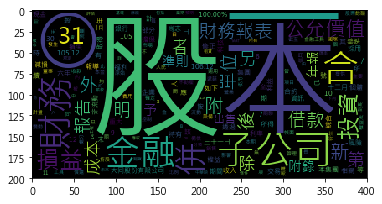

In [7]:
font = r"D:/NTUCSX/msjh.ttc"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [8]:
wordDict.keys()

dict_keys(['\ufeff', '大同股份有限公司', '子公司', '合', '併', '財務報表', '附', '一', '○', '六年', '十二月', '三十一日', '及民國', '五年', '除', '另', '有', '明', '者', '外', '均', '新', '單位', '沿革', '以下', '簡稱', '本', '依照', '公司法', '規定', '設立', '營利事業', '初', '七年', '創業', '成立', '組織', '28', '當時', '資本額', '18', '萬', '圓', '經數度', '增資為', '38', '年幣制', '改革', '後', '重新', '登記', '折算', '200', '截至', '民', '國一', '實收', '23', '395', '367', '其中', '已登記', '股本', '業務為', '下列', '各項', '產品', '設計', '製', '造', '買賣', '承裝', '網路', '系統', '自動化', '租賃', '維修', '服務及', '進', '出口', '銷售', '代理', '鋼', '機', '械', '類', '重電機', '器類', '家電機', '冷凍', '機器', '空調', '機器類', '6', '金屬', '加工', '7', '電子', '工業類', '8', '電線', '電纜類', '9', '化學', '10', '廚房', '用具', '11', '木材', '品', '12', '塑膠', '13', '事務', '用品', '14', '音樂', '器材', '15', '度量衡', '16', '輸送', '17', '交通', '醫藥', '19', '微生物', '醱', '酵', '產', '20', '建築', '事業類', '21', '家具', '22', '太', '陽能', '水處理', '工程', '24', '通信', '25', '停車場', '設備類', '26', '汽車類', '27', '半導體', '事', '業類', '不動產開', '發及', '二', '雜誌', '出版', '印刷', '業', '三', '報關業', '四', '一般', '貿', '易業務'

### 用出現次數進行排序
### 將出前10多的文字與次數儲存到一個list

In [9]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('股', 697),
 ('一', 571),
 ('本', 539),
 ('○', 515),
 ('子公司', 450),
 ('財務', 437),
 ('合', 431),
 ('金融', 429),
 ('併', 399),
 ('損益', 393)]

### 將list的詞彙儲存到label
### 將list的次數儲存到data
### 以 X:label   Y:data  作圖

In [10]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xd3456a0>,
 <a list of 10 Text xticklabel objects>)

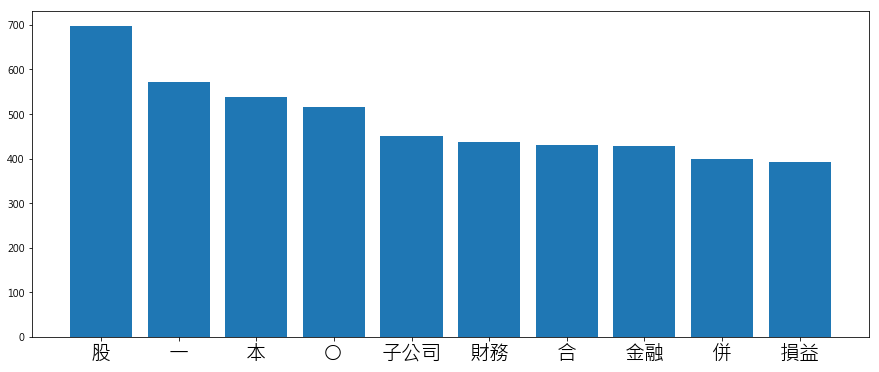

In [11]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)